<a href="https://colab.research.google.com/github/Aither-24/DataScience/blob/main/Data%20Science%20Salaries%202024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAD DATASET**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import estimator_html_repr
from sklearn import set_config
from IPython.core.display import display, HTML
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load dataset dan Read
file_path = "/content/data_science_salaries_cleaned.csv"
data = pd.read_csv(file_path)

# **DATA PREPROCESSING**

In [ ]:
# Pilih fitur yang digunakan dan target
features = ['experience_level', 'job_title', 'company_location']
target = 'salary_in_usd'
data = data[features + [target]]

# Menampilkan 5 baris pertama setelah seleksi fiturr
print(data.head())

  experience_level       job_title company_location  salary_in_usd
0        Mid-level   Data Engineer    United States         148100
1        Mid-level   Data Engineer    United States          98700
2     Senior-level  Data Scientist    United States         140032
3     Senior-level  Data Scientist    United States         100022
4        Mid-level    BI Developer    United States         120000


In [ ]:
# Urutkan kelas secara manual sebelum encoding
custom_order = ['Entry-level', 'Mid-level', 'Senior-level', 'Executive-level']
le = LabelEncoder()
le.classes_ = custom_order

# Lakukan Label Encoding pada kolom 'experience_level'
data['experience_level'] = data['experience_level'].apply(lambda x: custom_order.index(x))

# Menampilkan hasil encoding
print("\nData setelah Label Encoding:")
print(data[['experience_level']].head())

# Menampilkan mapping label ke angka
print("\nMapping Label Encoding:")
label_mapping = dict(zip(custom_order, range(len(custom_order))))
print(label_mapping)


Data setelah Label Encoding:
   experience_level
0                 1
1                 1
2                 2
3                 2
4                 1

Mapping Label Encoding:
{'Entry-level': 0, 'Mid-level': 1, 'Senior-level': 2, 'Executive-level': 3}


In [ ]:
# One-Hot Encoding untuk 'job_title' dan 'company_location'
data = pd.get_dummies(data, columns=['job_title', 'company_location'])

# Tampilkan data setelah One-Hot Encoding
print("\nData setelah One-Hot Encoding:")
print(data.head())


Data setelah One-Hot Encoding:
   experience_level  salary_in_usd  job_title_AI Architect  \
0                 1         148100                   False   
1                 1          98700                   False   
2                 2         140032                   False   
3                 2         100022                   False   
4                 1         120000                   False   

   job_title_AI Developer  job_title_AI Engineer  \
0                   False                  False   
1                   False                  False   
2                   False                  False   
3                   False                  False   
4                   False                  False   

   job_title_AI Product Manager  job_title_AI Programmer  \
0                         False                    False   
1                         False                    False   
2                         False                    False   
3                         False           

In [ ]:
# Normalisasi kolom target (salary_in_usd)
scaler = MinMaxScaler()
data['salary_in_usd'] = scaler.fit_transform(data[[target]])

# Menampilkan data setelah normalisasi
print("\nData setelah normalisasi:")
print(data[[target]].head())


Data setelah normalisasi:
   salary_in_usd
0       0.181088
1       0.113878
2       0.170112
3       0.115676
4       0.142857


# **MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Pisahkan data menjadi training dan testing set
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi dan latih model Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Visualisasi model Random Forest
set_config(display='diagram')  # Aktifkan mode diagram
display(rf)

RandomForestRegressor(random_state=42)

In [ ]:
# Prediksi pada data uji
y_pred = rf.predict(X_test)

# Menampilkan beberapa prediksi dan nilai sebenarnya
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("Perbandingan Nilai Aktual vs Prediksi:")
print(comparison_df.head(10))

Perbandingan Nilai Aktual vs Prediksi:
     Actual  Predicted
0  0.292517   0.247290
1  0.121088   0.217223
2  0.115646   0.207537
3  0.065361   0.062774
4  0.303401   0.217223
5  0.029623   0.065796
6  0.057446   0.079536
7  0.121088   0.161820
8  0.183673   0.113723
9  0.084762   0.104115


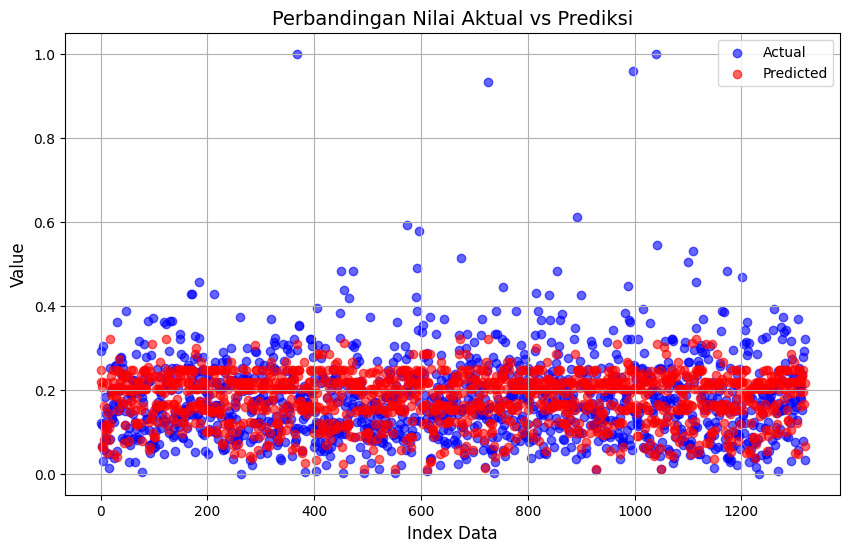

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Membuat plot
plt.figure(figsize=(10, 6))

# Scatter plot untuk nilai aktual
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)

# Scatter plot untuk nilai prediksi
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)

# Menambahkan informasi pada grafik
plt.title('Perbandingan Nilai Aktual vs Prediksi', fontsize=14)
plt.xlabel('Index Data', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

# **MODEL EVALUATION**

In [ ]:
# Evaluasi model menggunakan MAE dan RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Tampilkan hasil evaluasi
print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 0.0596
Root Mean Squared Error (RMSE): 0.0860


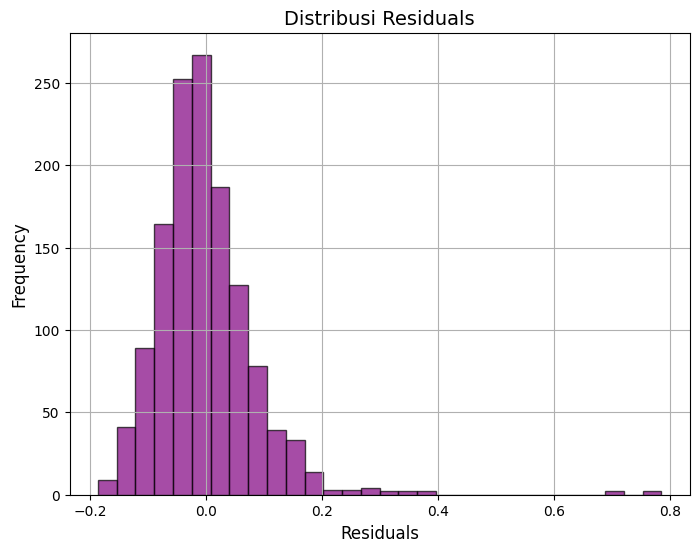

In [ ]:
import matplotlib.pyplot as plt

# Menghitung residuals (nilai aktual - prediksi)
residuals = y_test.values - y_pred

# Membuat histogram residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribusi Residuals', fontsize=14)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Menampilkan plot
plt.show()

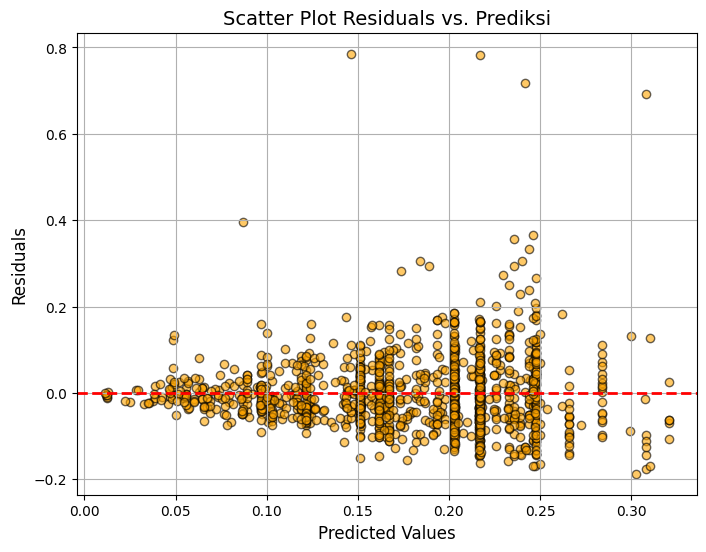

In [ ]:
# Scatter plot residuals vs prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='orange', alpha=0.6, edgecolor='black')
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.title('Scatter Plot Residuals vs. Prediksi', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True)

# Menampilkan plot
plt.show()